# Plotting time-series data

## Plotting time-series data

In [1]:
# Import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the datetime data from file using read_csv
climate_change = pd.read_csv('climate_change.csv', parse_dates = ['date'], index_col = 'date')

# set x value to index
ax.plot(climate_change.index ,climate_change['relative_temp'])

## Plotting time-series with different variables

using twin axis

In [3]:
# generate random number
number = 30

x = np.arange(1, number + 1)

y1 = np.random.normal(10, 3, size=(number))


y2 = np.random.normal(200, 50, size=(number)) 

In [ ]:
fix, ax = plt.subplots()
ax.plot(x, y1, color = 'b')
ax.set_xlabel('Time (month)')
ax.set_ylabel('Profit ($ thousand)', color = 'b') 
ax.tick_params('y', colors = 'b')
# use twin axes
ax2 = ax.twinx()
ax2.bar(x, y2, color = 'r', alpha = 0.1)
ax2.set_ylabel('Operation Cost ($ thousand)', color = 'r')
ax2.tick_params('y', colors = 'r')

## Annotating time-series data

In [5]:
import yfinance as yf
from datetime import datetime

In [6]:
ticker = yf.Ticker('ASML')

In [27]:
asml_data = ticker.history(start="2023-01-01", end="2023-12-31")

In [28]:
asml_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Volume        250 non-null    int64  
 5   Dividends     250 non-null    float64
 6   Stock Splits  250 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.6 KB


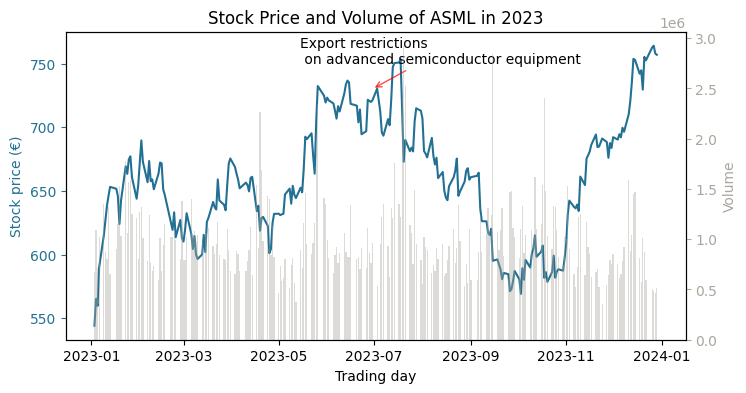

In [29]:
fig, ax = plt.subplots(figsize =(8,4))

ax.plot(asml_data.index, asml_data['Close'], color = '#227093')

ax.set_xlabel('Trading day')
ax.set_ylabel('Stock price (€)', color = '#227093')
ax.tick_params('y',colors = '#227093')
ax.set_title('Stock Price and Volume of ASML in 2023')


"""
xy : (float, float)
The point (x,y) to annotate.

xytext : (float, float), optional
The position (x,y) to place the text at. If None, defaults to xy.
"""
ax.annotate('Export restrictions \n on advanced semiconductor equipment', 
            xy = (pd.Timestamp('2023-06-30'), 730),
            # position the text
            xytext = (pd.Timestamp('2023-05-15'), 750),
            # add arrow from annotation to the annotating point
            arrowprops={
                "arrowstyle":'->',
                'color' : 'r',
                'alpha' : 0.7
            }
           )
ax2 = ax.twinx()



ax2.bar(asml_data.index, asml_data['Volume'], color= '#aaa69d', alpha = 0.4)
ax2.set_ylabel('Volume', color= '#aaa69d')
ax2.tick_params( colors = '#aaa69d')
